# Recurrent Neural Networks (RNNs)

Recurrent Neural Networks (RNNs) are a class of artificial neural networks designed for processing sequential data. Unlike traditional feedforward neural networks, RNNs have connections that loop back on themselves, allowing them to maintain a hidden state that can capture information about previous inputs in the sequence.

RNNs are particularly useful for tasks such as time series prediction, natural language processing, and speech recognition, where the order and context of the data points are crucial for understanding the underlying patterns.

## Example: LSTM to Predict Sine Wave

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3368 - val_loss: 0.0222
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0194 - val_loss: 0.0135
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - val_loss: 0.0127
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - val_loss: 0.0123
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - val_loss: 0.0123
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - val_loss: 0.0122
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - val_loss: 0.0119
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - val_loss: 0.0119
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - val_loss: 0.0116
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - val_loss: 0.0122
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - val_loss: 0.0115
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - val_lo

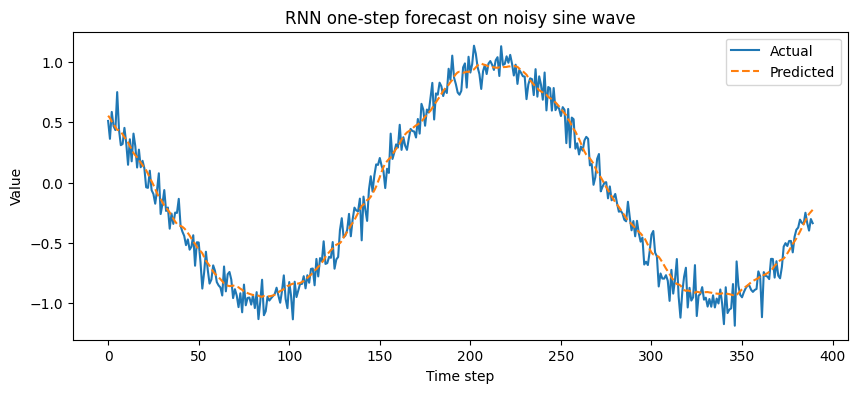

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Generate a noisy sine-wave dataset
np.random.seed(42)
TIMESTEPS = 50        # input sequence length
TOTAL_POINTS = 2000   # total sine points
TEST_SPLIT = 0.2

x = np.linspace(0, 50, TOTAL_POINTS)
sine = np.sin(x) + 0.1 * np.random.randn(TOTAL_POINTS)  # add some noise

# Transform the data into (samples, timesteps, features)
def make_dataset(series, window):
    X, y = [], []
    for i in range(len(series) - window):
        X.append(series[i : i + window])
        y.append(series[i + window])
    return np.array(X), np.array(y)

X, y = make_dataset(sine, TIMESTEPS)
X = X[..., np.newaxis]   # shape → (samples, timesteps, 1)
y = y[..., np.newaxis]

# Train / validation split
split_idx = int(len(X) * (1 - TEST_SPLIT))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Define a simple RNN model (or LSTM)
model = Sequential([
    LSTM(64, activation="tanh", input_shape=(TIMESTEPS, 1)),
    Dense(1)                      # one-step forecast
])

model.compile(optimizer="adam", loss="mse")
model.summary()

# Train
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32
)

# Predict the test set
preds = model.predict(X_test).squeeze()

# Plot actual vs. predicted
plt.figure(figsize=(10, 4))
plt.plot(range(len(y_val)), y_val.squeeze(), label="Actual")
plt.plot(range(len(preds)), preds, label="Predicted", linestyle="--")
plt.title("RNN one-step forecast on noisy sine wave")
plt.xlabel("Time step")
plt.ylabel("Value")
plt.legend()
plt.show()

## Hands-on Exercise